In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [3]:
files= np.loadtxt('c1data.txt', dtype='str')
darks = np.loadtxt('darksc1.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatac1 = allimagedata - darksmedia

We plot an example one

<matplotlib.colorbar.Colorbar instance at 0x7fa0d7a89a70>

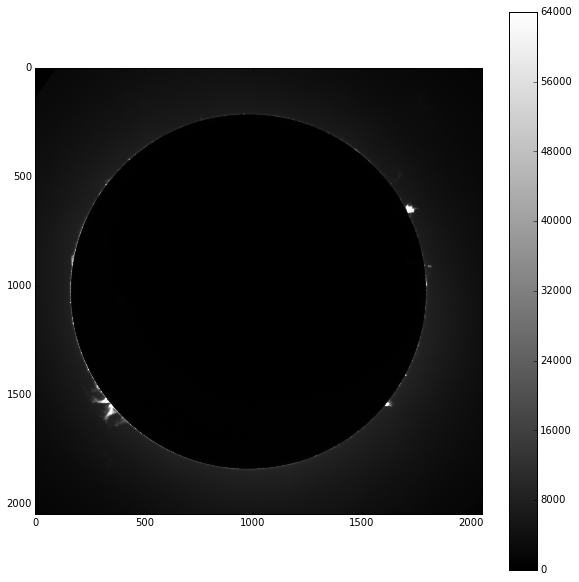

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(flatteddatac1[0],cmap='gray')
plt.colorbar()

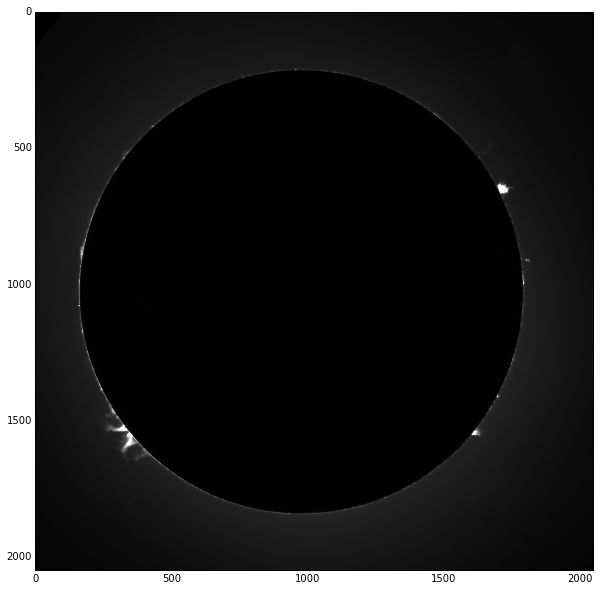

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(allimagedata[0],cmap='gray')

In [ ]:
for i in range(80):
    fits.writeto(files[i]+'processed'+'.fts',flatteddatac1[i],header=fits.open(files[i])[0].header)

In [ ]:
onefit=fits.getdata('imoa_06563_c1_20160126_12281100_b1.ftsprocessed.fts')
headerone=fits.open('imoa_06563_c1_20160126_12281100_b1.ftsprocessed.fts')[0].header
plt.imshow(onefit,cmap='gray')
plt.colorbar()


# Brillance

We create the median of all the flatted data.

In [8]:
medianflattedc1 = np.median(flatteddatac1, axis=0)

<matplotlib.colorbar.Colorbar instance at 0x7fa080808368>

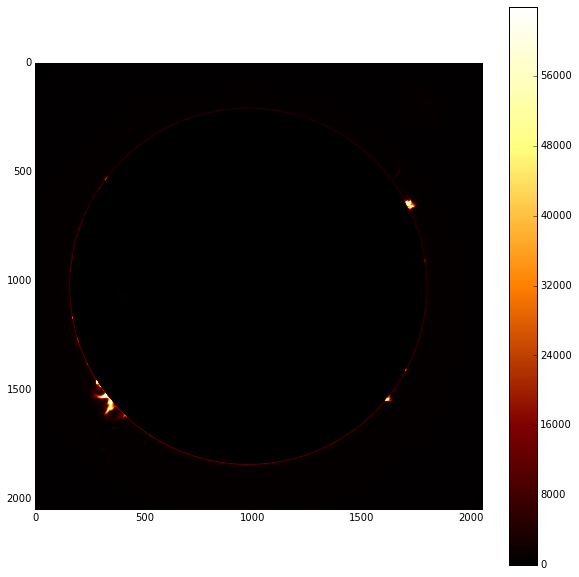

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(medianflattedc1, cmap='afmhot')
plt.colorbar()

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

<matplotlib.colorbar.Colorbar instance at 0x7fa0800fcef0>

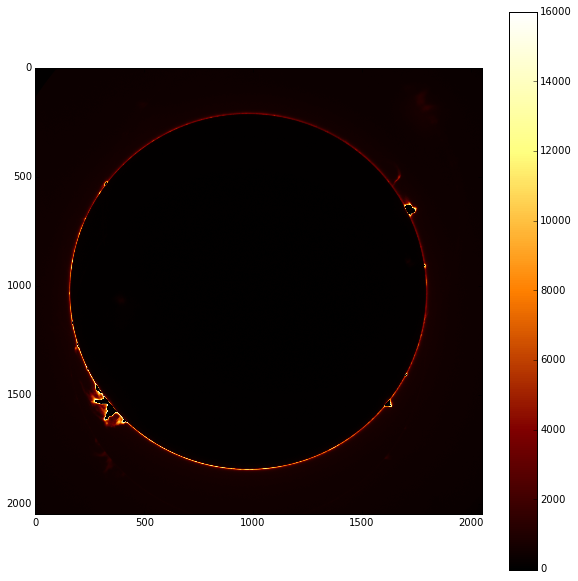

In [34]:
maskc1 = medianflattedc1 < 16000
maskedc1=(np.where(maskc1,1,0))*medianflattedc1
plt.figure(figsize=(10, 10))
plt.imshow(maskedc1, cmap='afmhot')
plt.colorbar()

The resulting masked image looks like:

<matplotlib.colorbar.Colorbar instance at 0x7fa07bf51830>

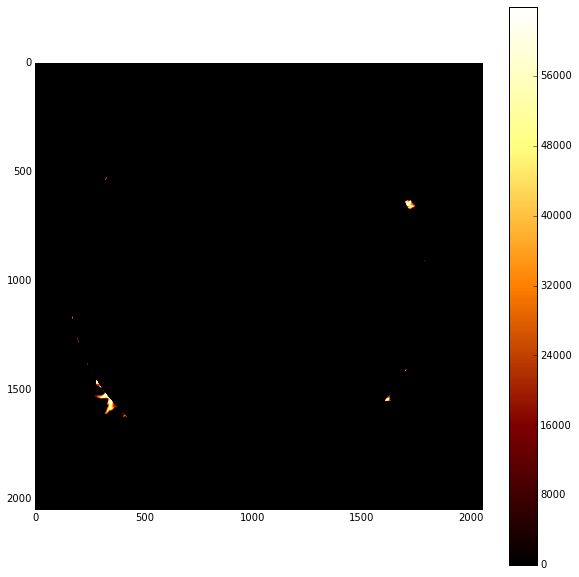

In [35]:
maskc1 = medianflattedc1 < 16000
maskedc1=(np.where(maskc1,0,1))*medianflattedc1
plt.figure(figsize=(10, 10))
plt.imshow(maskedc1, cmap='afmhot')
plt.colorbar()

Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [36]:
totalc1 = np.sum(maskedc1)
print(totalc1)

209015446.0


# Brillance Callibration
 